In [2]:
import os
import sys
import cortex
import re
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import torch
import seaborn as sns
import nibabel as nib
import pickle
import torchvision.models as models
import nibabel as nib
import h5py
import scipy.stats.mstats as mstats
import matplotlib.patches as patches
from PIL import Image


print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve

['/home/rfpred/notebooks/construction_work', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg']


In [4]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
NSP = NatSpatPred()
NSP.initialise(verbose=True)
rl = Reloader()

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


In [3]:
rois, roi_masks, viscortex_masks = NSP.cortex.visrois_dict(verbose=False)
prf_dict = NSP.cortex.prf_dict(rois, roi_masks)

In [31]:
370 % 360

10

In [1]:
n_patches = 6
def get_angle_step(n_patches):
    # patch_sequence = [(patch * (360 / n_patches)) for patch in list(range(0, n_patches))]
    patch_sequence = [(patch * (360 / n_patches) + 90) % 360 for patch in range(n_patches)]

    return patch_sequence

peri_angles = get_angle_step(n_patches)

print(peri_angles)

[90.0, 150.0, 210.0, 270.0, 330.0, 30.0]


Now working on patch with angle 90.0
V1 voxels that fulfill requirements: 71 out of 7887.
V2 voxels that fulfill requirements: 89 out of 8296.
V3 voxels that fulfill requirements: 18 out of 7022.
V4 voxels that fulfill requirements: 15 out of 3976.
Now working on patch with angle 150.0
V1 voxels that fulfill requirements: 94 out of 7887.
V2 voxels that fulfill requirements: 114 out of 8296.
V3 voxels that fulfill requirements: 24 out of 7022.
V4 voxels that fulfill requirements: 3 out of 3976.
Now working on patch with angle 210.0
V1 voxels that fulfill requirements: 201 out of 7887.
V2 voxels that fulfill requirements: 26 out of 8296.
V3 voxels that fulfill requirements: 28 out of 7022.
V4 voxels that fulfill requirements: 14 out of 3976.
Now working on patch with angle 270.0
V1 voxels that fulfill requirements: 31 out of 7887.
V2 voxels that fulfill requirements: 23 out of 8296.
V3 voxels that fulfill requirements: 46 out of 7022.
V4 voxels that fulfill requirements: 12 out of 3976.


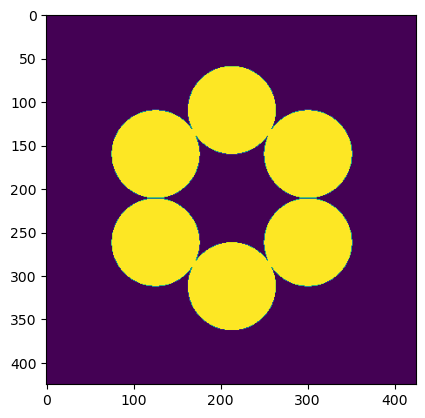

In [52]:
# Perhaps even better to do some sort of matrix multiplication with a boolean mask to to solley select 
# the voxels that are exclusively inside the patch. But this is better to do after having done this selection
# than checking it for every single voxel beforehand.

# Double check whether the peripheral patches are fully vectorised, they take some time still (not much though)

subject = "subj01"
max_size = 2
min_size = 0.15
patchbound = 1
min_nsd_R2 = 0
min_prf_R2 = 0
# peripheral_center = (-2, 2)
# peri_angles = [90, 210, 330]
peri_ecc = 2  #1.2
# fixed_n_voxels = 50


for patch_no, angle in enumerate(peri_angles):
    voxeldict = {}
    print(f"Now working on patch with angle {angle}")
    for roi in rois:
        print_attr = True if roi == rois[len(rois) - 1] else False
        voxeldict[roi] = VoxelSieve(
            NSP,
            prf_dict,
            roi_masks,
            subject=subject,
            roi=roi,
            patchloc="peripheral",
            max_size=max_size,
            min_size=min_size,
            patchbound=patchbound,
            min_nsd_R2=min_nsd_R2,
            min_prf_R2=min_prf_R2,
            print_attributes=False, #print_attr,
            fixed_n_voxels=None,
            peripheral_center=None,
            peri_angle=angle,
            peri_ecc=peri_ecc,
            leniency = 0.25,
            verbose=False
        )
        
    if patch_no == 0:
        mask_stack = voxeldict[roi].patchmask
    else:
        mask_stack = mask_stack + voxeldict[roi].patchmask
        
plt.imshow(mask_stack)

ROI V4 contains 31 voxels
Patch centre at y: 263.5952380952381, and x:300.5297619047619


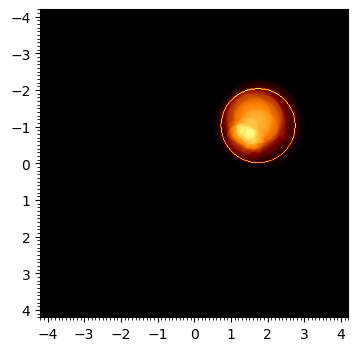

In [53]:
# roi = "V1"
# for roi in rois:
print(f"ROI {roi} contains {len(voxeldict[roi].size)} voxels")
NSP.cortex.plot_prfs(voxeldict[roi], enlarge=False, which_voxels="all", cmap="afmhot")

In [12]:
mask1 = (voxeldict[roi].patchmask)

In [57]:
lgn = rl.lgn(config_file='default_config.yml')

NSP = rl.nsp()
NSP.initialise()

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .attributes_unfiltered
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


{'ecc1.2_angle90': Empty DataFrame
 Columns: [rms, ce, sc]
 Index: [],
 'ecc1.2_angle210': Empty DataFrame
 Columns: [rms, ce, sc]
 Index: [],
 'ecc1.2_angle330': Empty DataFrame
 Columns: [rms, ce, sc]
 Index: []}

Load in the images

In [112]:
n_imgs = 4

imgs, img_nos = NSP.stimuli.rand_img_list(n_imgs = n_imgs,
                                          asPIL = True,
                                          add_masks = False,
                                        #   select_ices = NSP.stimuli.imgs_designmx()["subj01"][:n_imgs])
)

Compute RMS

In [113]:
eccentricity = 1.2
angle = 90
patch_data = pd.DataFrame(columns=['rms', 'ce', 'sc'])

In [114]:
mask = mask1



for img in imgs:

    rms = NSP.stimuli.calc_rms_contrast_lab(
        # rgb_image=np.array(Image.open(img)),
        rgb_image=np.array(img),
        mask_w_in=mask,
        rf_mask_in=mask,
        normalise=True,
        plot=False,
        cmap="gist_gray",
        crop_post=False,
        lab_idx=0,
        cropped_input=False)
    
    ce, sc, _,_,_,_,_ = NSP.stimuli.get_scce_contrast(np.array(img),
                                plot="n",
                                cmap="gist_gray",
                                crop_prior=True,
                                crop_post=False,
                                save_plot=False,
                                return_imfovs=True,
                                imfov_overlay=True,
                                config_path="/home/rfpred/notebooks/alien_nbs/lgnpy/lgnpy/CEandSC/psybi_cfs_config.yml",
                                lgn_instance=lgn,
                                patch_center=NSP.utils.get_circle_center(mask),
                                deg_per_pixel=(8.4 / 425))

    ce = np.nan_to_num(ce)
    sc = np.nan_to_num(sc)
    
    # features[feature].loc[len(features[feature])] = [rms, ce, sc]
    
    patch_data.loc[len(patch_data)] = [rms, ce, sc]


In [115]:
patch_data

,rms,ce,sc
0,18.913477,0.001663,0.968341
1,23.210805,0.000118,0.651817
2,15.446960,0.001816,0.779151
3,11.653643,0.001829,0.568407


In [79]:
NSP.own_datapath

'/home/rfpred/data/custom_files'

In [101]:
patch_data.to_csv(f"{NSP.own_datapath}/visfeats/peripheral/rmsscce_ecc{eccentricity}_angle{angle}.csv")

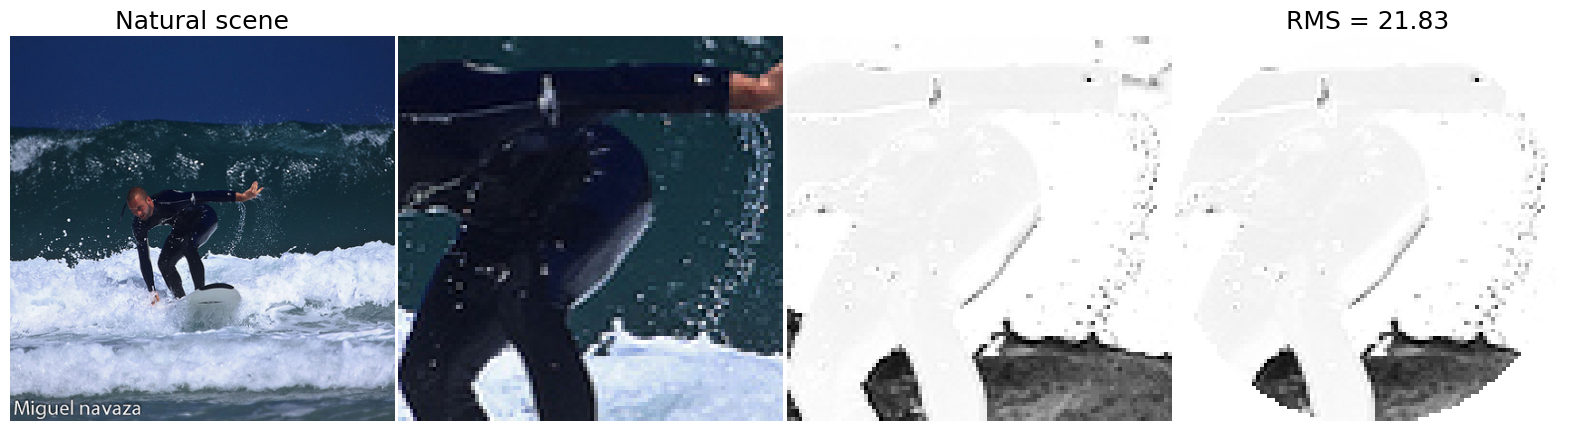

In [65]:
cmask = NSP.utils.make_circle_mask(425, 213, 213, 1 * (425 / 8.4), fill="y", margin_width=1).astype(bool)

# plt.imshow(cmask)

rms = NSP.stimuli.calc_rms_contrast_lab(
    # rgb_image=np.array(Image.open(img)),
    rgb_image=np.array(imgs[2]),
    mask_w_in=cmask,
    rf_mask_in=cmask,
    normalise=True,
    plot=True,
    cmap="gist_gray_r",
    crop_post=False,
    lab_idx=0,
    cropped_input=False)




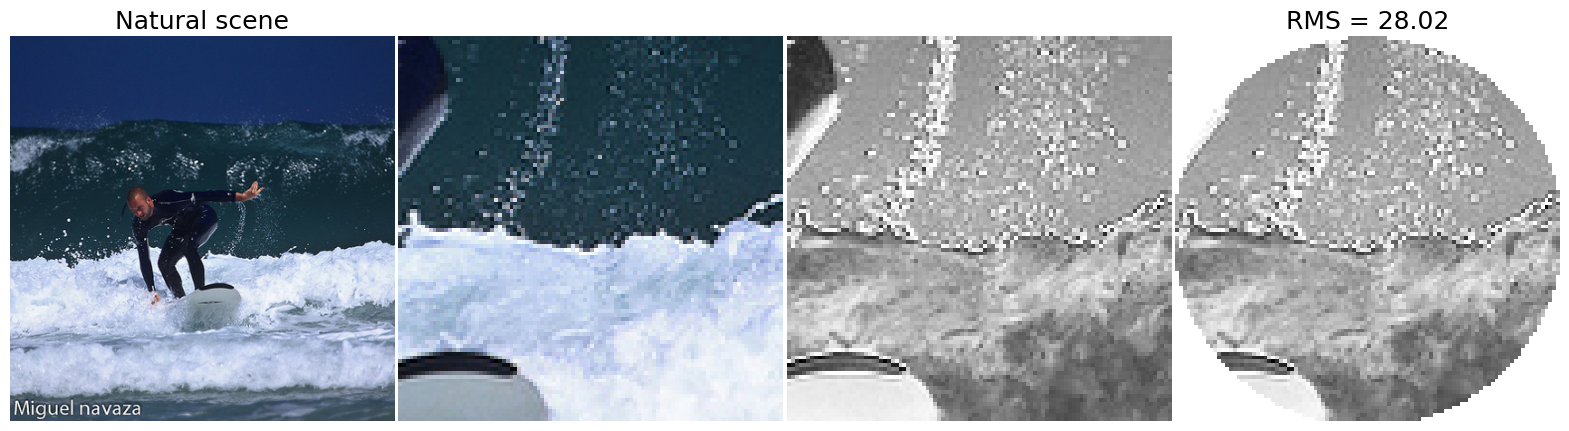

In [66]:
rms = NSP.stimuli.calc_rms_contrast_lab(
    # rgb_image=np.array(Image.open(img)),
    rgb_image=np.array(imgs[2]),
    mask_w_in=mask1,
    rf_mask_in=mask1,
    normalise=True,
    plot=True,
    cmap="gist_gray_r",
    crop_post=False,
    lab_idx=0,
    cropped_input=False)


/home/rfpred/notebooks/alien_nbs/lgnpy/lgnpy/CEandSC/lgn_statistics.py:683: RuntimeWarning: invalid value encountered in scalar divide
  sc[0,0,0] = np.mean(magnitude) / np.std(magnitude)


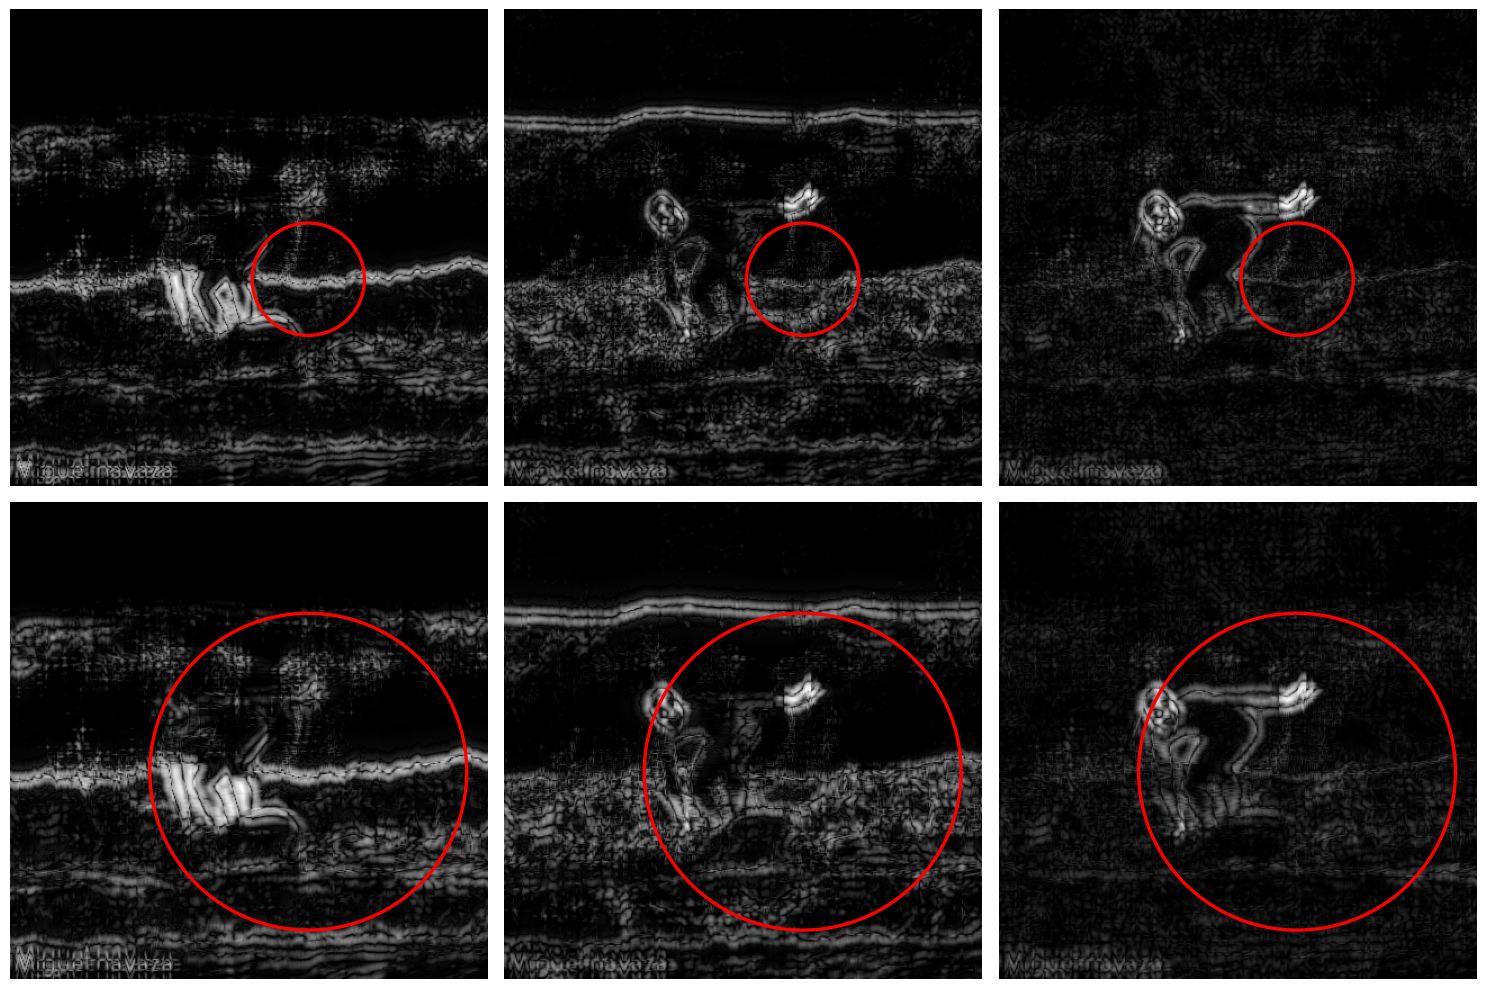

In [69]:
ce, sc, _,_,_,_,_ = NSP.stimuli.get_scce_contrast(np.array(imgs[2]),
                            plot="y",
                            cmap="gist_gray",
                            crop_prior=True,
                            crop_post=False,
                            save_plot=False,
                            return_imfovs=True,
                            imfov_overlay=True,
                            config_path="/home/rfpred/notebooks/alien_nbs/lgnpy/lgnpy/CEandSC/psybi_cfs_config.yml",
                            lgn_instance=lgn,
                            patch_center=NSP.utils.get_circle_center(mask),
                            deg_per_pixel=(8.4 / 425))

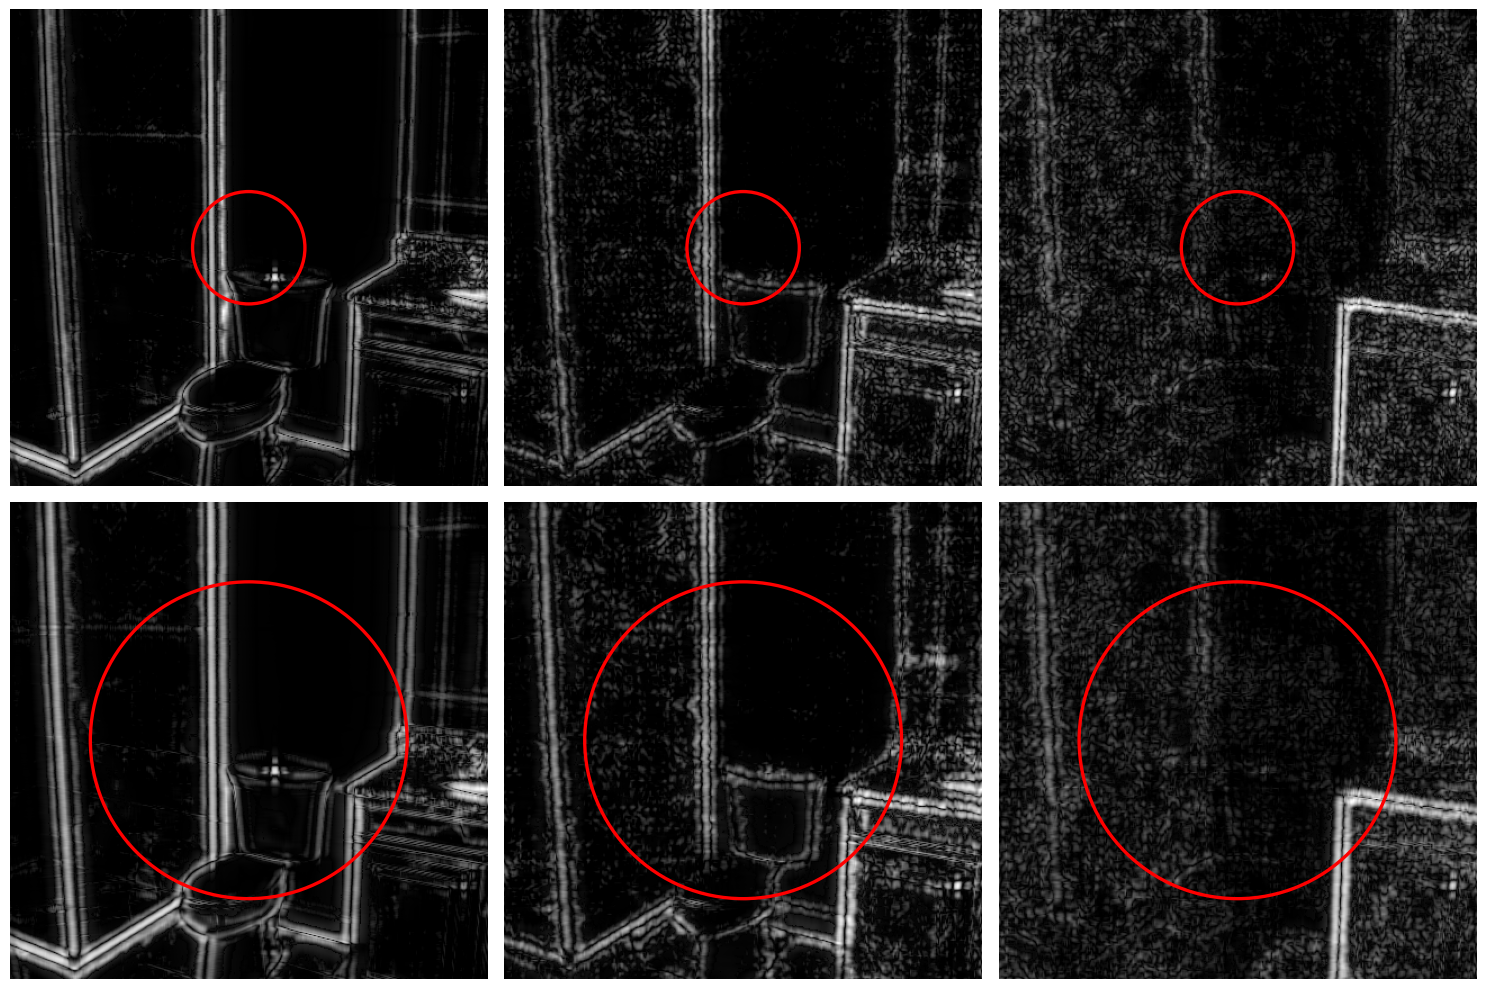

In [49]:
ce, sc, _,_,_,_,_ = NSP.stimuli.get_scce_contrast(np.array(img),
                            plot="y",
                            cmap="gist_gray",
                            crop_prior=True,
                            crop_post=False,
                            save_plot=False,
                            return_imfovs=True,
                            imfov_overlay=True,
                            config_path="/home/rfpred/notebooks/alien_nbs/lgnpy/lgnpy/CEandSC/psybi_cfs_config.yml",
                            lgn_instance=lgn,
                            patch_center=NSP.utils.get_circle_center(cmask),
                            deg_per_pixel=(8.4 / 425))

In [104]:
imgs, img_nos = NSP.stimuli.rand_img_list(
    n_imgs=2,
    asPIL=True,
    add_masks=False,
    # select_ices=NSP.stimuli.imgs_designmx()["subj01"][:n_imgs],
)


imgs


[<PIL.Image.Image image mode=RGB size=425x425>,
 <PIL.Image.Image image mode=RGB size=425x425>]

### Unpred

In [118]:
def prepare_dat(
    all_imgs: list,
    mask: list,
    img_startstop: (tuple | None)=None,
    specific_imgs: list | None = None,
    ):
    """
    Prepare the data for further processing.

    Args:
        all_imgs (list): List of image paths.
        mask (list): Mask image.
        img_startstop (tuple, optional): Start and stop indices for selecting specific images. Default None
        specific_imgs (list, optional): List of indices of specific images to select. Defaults to None.

    Returns:
        tuple: A tuple containing the prepared image list and mask list.
    """
    if img_startstop is None:
        img_startstop = (0, len(all_imgs))
    
    if specific_imgs is not None:
        all_imgs = [all_imgs[i] for i in specific_imgs]
    else: 
        all_imgs = all_imgs[img_startstop[0]:img_startstop[1]]

    def _jpeg_to_pil(img):
        return Image.fromarray(np.array(Image.open(img)))

    img_list = [(_jpeg_to_pil(plaat)) for plaat in all_imgs]
    n_imgs = len(img_list)
    mask_list = [Image.fromarray(mask)] * n_imgs
    
    return img_list, mask_list

In [ ]:
chunk_size = n_imgs

for img in imgs:

    # Initialize an empty DataFrame to store the results
    df_all = pd.DataFrame()
    
    # Process the images in chunks
    for i in range(0, len(imgs), chunk_size):
        print(f"Processing chunk {i//chunk_size + 1}/{len(imgs)//chunk_size + 1}")
        img_list, mask_list = prepare_dat(imgs[i:i+chunk_size], mask)
        
        estims = NSP.stimuli.comp_unpred(
            cnn_type="vgg-b",
            pretrain_version="places20k",
            eval_mask_factor=np.sqrt(1.2),
            input_imgs=img_list,
            input_masks=mask_list,
            plot_eval_mask=False
        )
        content_losses = {key: value for key, value in estims.items() if "content" in key and "MSE" in key}
        
        df_chunk = add_feats_to_df(ui[f'features_{feat}'][i:i+chunk_size], content_losses, cut_rows=chunk_size)
        
        # Append the results of this chunk to df_all
        df_all = pd.concat([df_all, df_chunk])
    
    # Store the results in ui
    ui[f'features_{feat}'] = df_all      